In [1]:
import nglview
from ase import Atoms
from ase.visualize import view
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
import subprocess
subprocess.run(["sbatch", "sbatch.sh"])
subprocess.run(["squeue"])

CompletedProcess(args=['squeue'], returncode=0)

In [2]:
subprocess.run(["sh", "slurm_notification.sh"])

CompletedProcess(args=['sh', 'slurm_notification.sh'], returncode=0)

Читаем dump.file для nemd

In [4]:
def read_dump(filename):
        f=open(filename,"r")
        lines_init = f.readlines()
        N=int(lines_init[3])
        lines =[]
        l = len(lines_init)
        coord_of_time=dict()
        velocity_of_time=dict()
        for g in range(0, l, N+9):
            for line in lines_init[g:g+N+9]: lines.append(line)
        while len(lines)>0:
                step=int(lines[1])
                N=int(lines[3])
                coord=dict()
                v=dict()
                for i in range(N):
                        line_from_split = lines[9+i].split()
                        id_of_atom=int(line_from_split[0])
                        x=float(line_from_split[2])
                        y=float(line_from_split[3])
                        vx=float(line_from_split[5])
                        vy=float(line_from_split[6])
                        coord[id_of_atom] = [x, y]
                        v[id_of_atom] = [vx, vy]
                coord_of_time[step]=[coord]
                velocity_of_time[step]=[v]
                lines=lines[9+N:]
        return coord_of_time, velocity_of_time 

coords, velocities = read_dump("dump.nemd1")
coords2, velocities2 = read_dump("dump.nemd2")
print(len(coords2))

51


No handles with labels found to put in legend.


<Figure size 1152x1152 with 0 Axes>

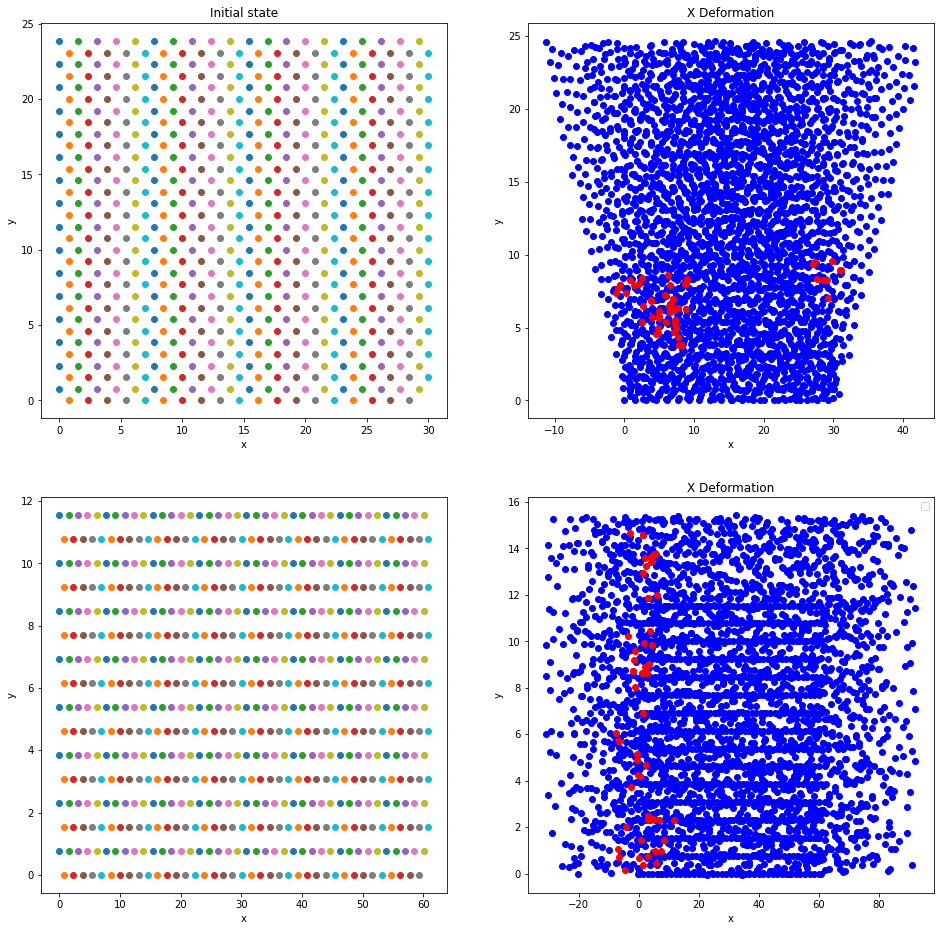

In [10]:
plt.rcParams["figure.figsize"] = (16,16)
fig = plt.figure()

fig, ax = plt.subplots(2, 2, squeeze=False)

ax[0][0].set_title('Initial state')
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('y')
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('y')
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('y')
for i in range(1, 640):
    ax[0][0].plot(coords[0][0][i][0], coords[0][0][i+1][1], 'o')
    ax[1][0].plot(coords2[0][0][i][0], coords2[0][0][i+1][1], 'o')
    
ax[0][1].set_title('X Deformation')
ax[1][1].set_title('X Deformation')
for k in range(5):
    for i in range(640):
        ax[0][1].plot(coords[k*10000][0][i+1][0], coords[k*10000][0][i+1][1], 'bo')
        ax[1][1].plot(coords2[k*10000][0][i+1][0], coords2[k*10000][0][i+1][1], 'bo')

p = 90
ax[0][1].plot(coords[0][0][p][0], coords[0][0][p][1], 'ro', label = 'single particle')
for k in range(50):
        ax[0][1].plot(coords[k*1000][0][p][0], coords[k*1000][0][p][1], 'ro')
        ax[1][1].plot(coords2[k*1000][0][p][0], coords2[k*1000][0][p][1], 'ro')
        
plt.legend()

Построим траекторию одной из частиц

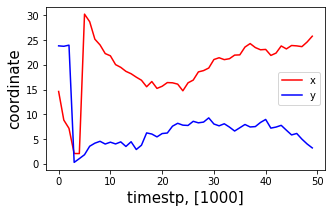

In [11]:
plt.rcParams["figure.figsize"] = (5,3)
partx_t = []
party_t = []
for i in range (0, 50000, 1000):
    partx_t.append(coords[i][0][320][0])
    party_t.append(coords[i][0][320][1])


plt.plot(partx_t, 'r', label = 'x')
plt.plot(party_t, 'b', label = 'y')
plt.xlabel('timestp, [1000]', fontsize = 15)
plt.ylabel('coordinate', fontsize = 15)
plt.legend()

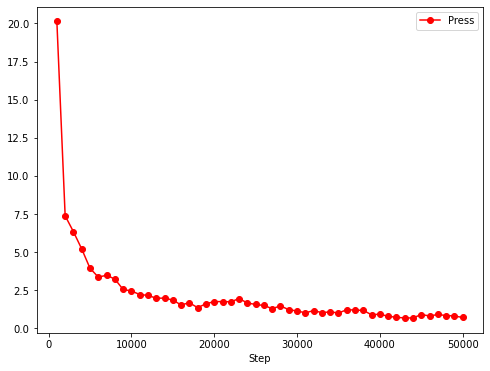

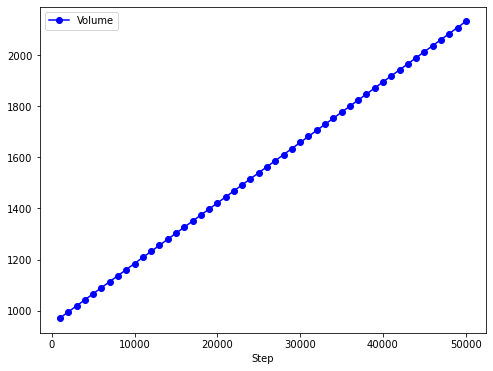

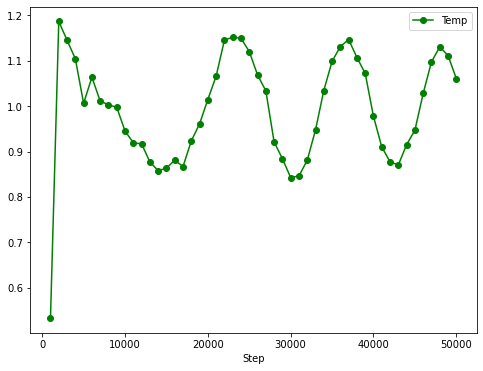

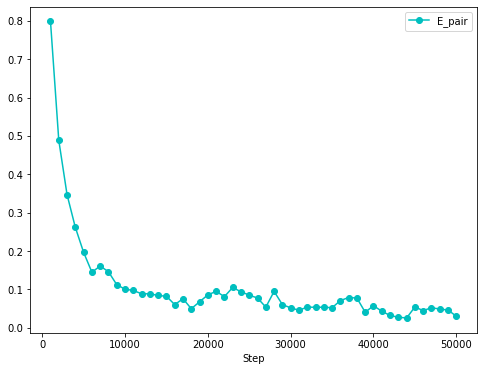

In [7]:
plt.rcParams["figure.figsize"] = (8,6)

f=open("log.lammps","r")
lines_init = f.readlines()
lines_lammps = lines_init[60:110]
lines_lammps = [l.split() for l in lines_lammps]

COLUMNS = ["Step", "Temp", "E_pair", "E_mol", "TotEng", "Press", "Volume"]
loglammps = pd.DataFrame(lines_lammps, dtype = float)
loglammps.columns = COLUMNS

loglammps.plot(x = "Step", y = "Press", marker = 'o', color = 'r')
plt.savefig("Press.png")
loglammps.plot(x = "Step", y = "Volume", marker = 'o', color = 'b')
plt.savefig("Vol.png")
loglammps.plot(x = "Step", y = "Temp", marker = 'o', color = 'g')
plt.savefig("Temp.png")
loglammps.plot(x = "Step", y = "E_pair", marker = 'o', color = 'c')
plt.savefig("E_pair.png")


In [8]:
subprocess.run(["sh", "send_plot.sh"])

CompletedProcess(args=['sh', 'send_plot.sh'], returncode=0)

In [9]:
def read_xyz(filename):
        images = []
        pos = []
        f=open(filename,"r")
        lines_init = f.readlines()
        N=int(lines_init[3])
        lines =[]
        l = len(lines_init)
        coord_of_time=dict()
        velocity_of_time=dict()
        for g in range(0, l, N+9):
            for line in lines_init[g:g+N+9]: lines.append(line)
        while len(lines)>0:
            positions = []
            symbols = []
            step=int(lines[1])
            N=int(lines[3])
            for i in range(N):
                line_from_split = lines[9+i].split()
                x, y, z = line.split()[1:4]
                positions.append([float(x), float(y), float(z)])
                symbols.append('O')
            images.append(Atoms(symbols=symbols, positions=positions))
            pos.append(positions)
            lines=lines[9+N:]
                
        return pos
data = read_xyz("dump.nemd1")

#import nglview as ngl
#view(data, viewer='ngl')


CondaVerificationError: The package for libglib located at /home/common/studtscm12/anaconda3/pkgs/libglib-2.68.2-h3e27bee_0
appears to be corrupted. The path 'share/locale/zh_HK/LC_MESSAGES/glib20.mo'
specified in the package manifest cannot be found.
